## Install neccesary libraries for EDA

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

## Load dataset

In [5]:
df = pd.read_csv("./data/diabetes.csv", sep=",")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


# EDA

## Basic Overview

In [6]:
df.shape
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


,count,mean,std,min,25%,50%,75%,max
AGE,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
SEX,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
BMI,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
BP,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
S1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
S2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
S3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
S4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
S5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
S6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


## Missing values

In [7]:
df.isnull().sum()

,0
AGE,0
SEX,0
BMI,0
BP,0
S1,0
S2,0
S3,0
S4,0
S5,0
S6,0


## Correlation Heatmap

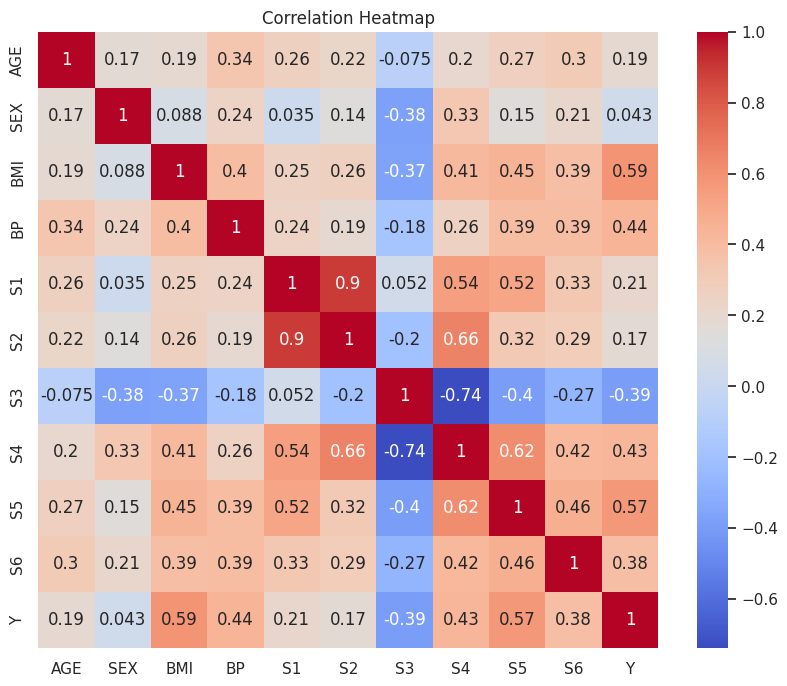

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Feature Distributions

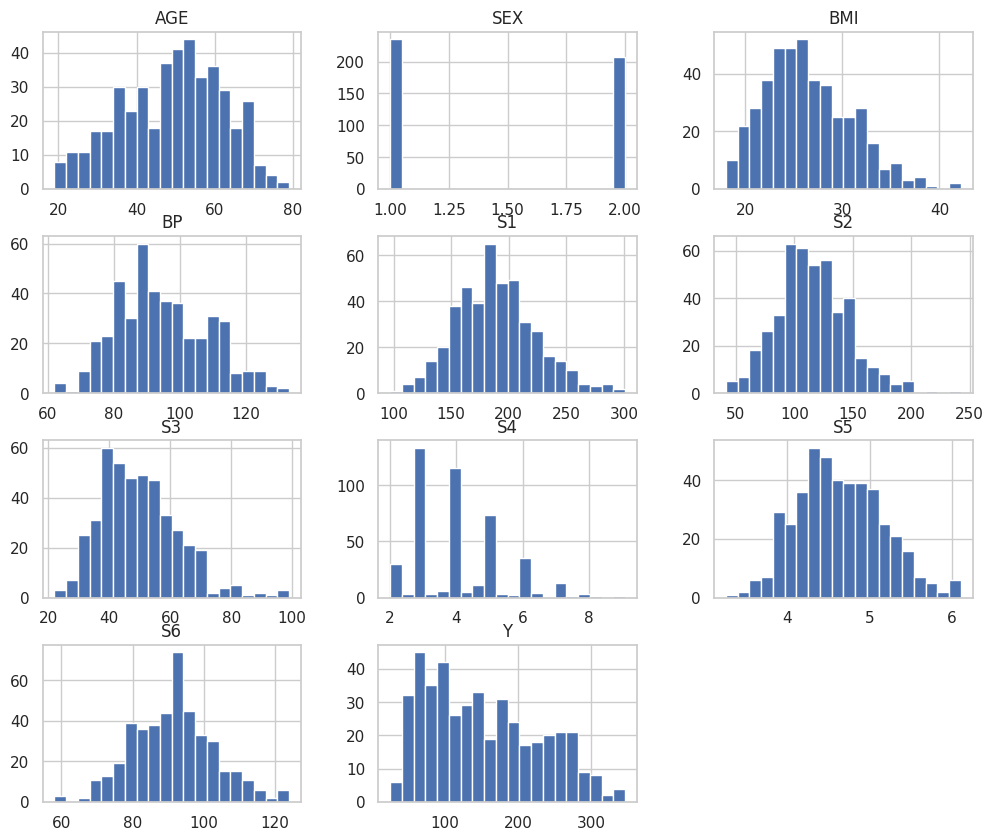

In [9]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

## Show outliers

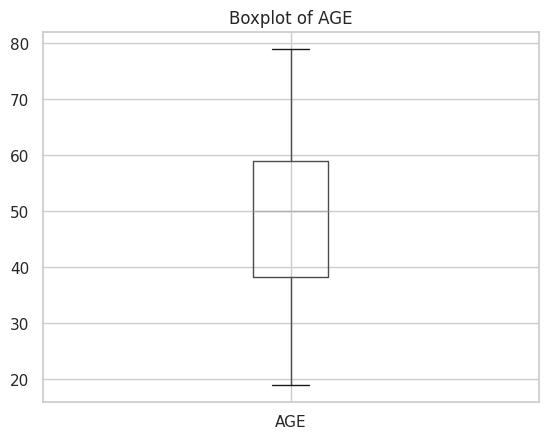

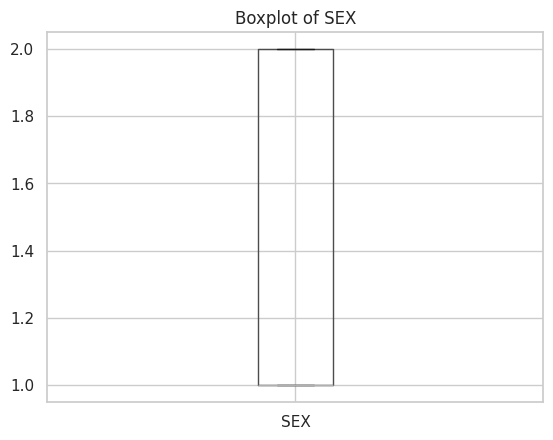

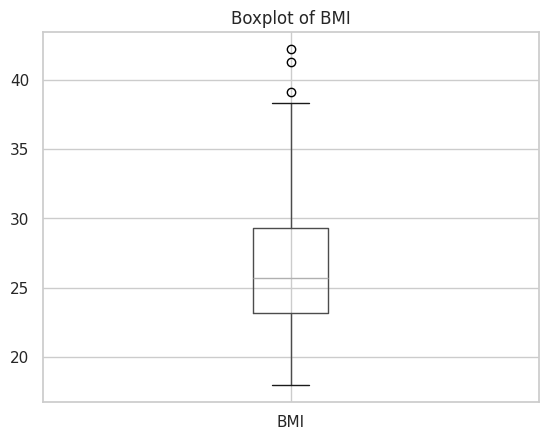

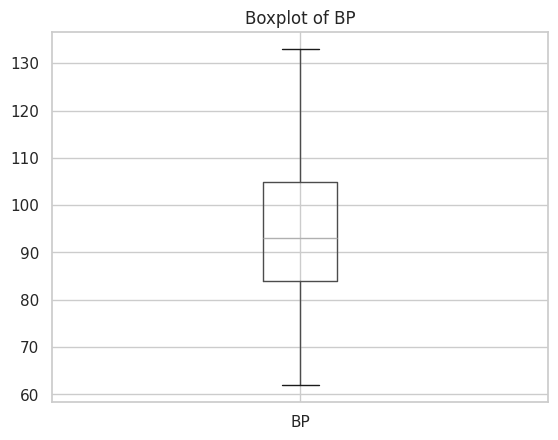

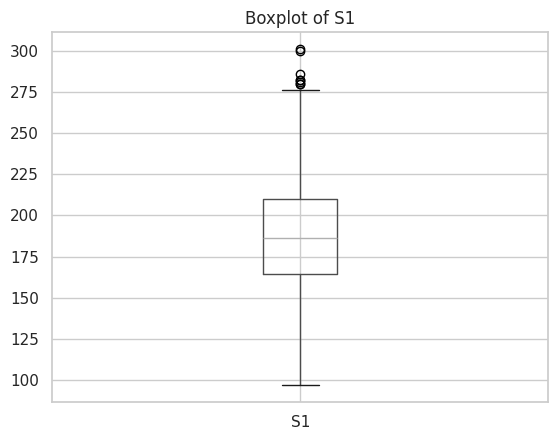

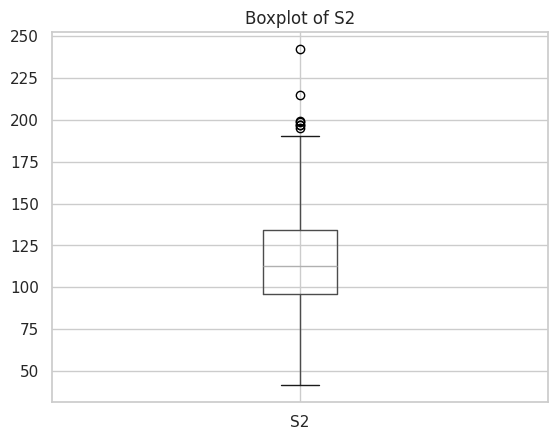

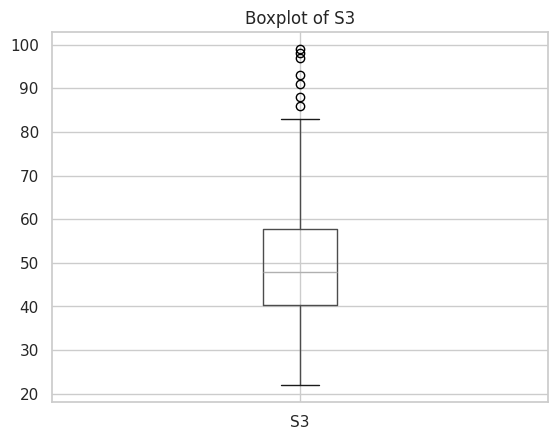

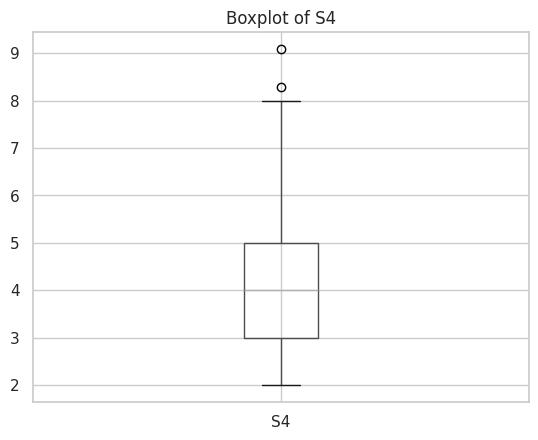

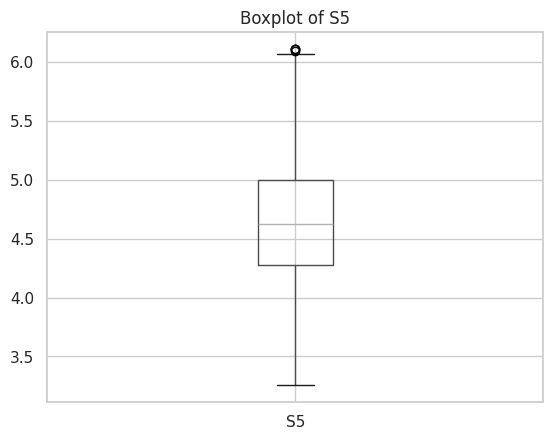

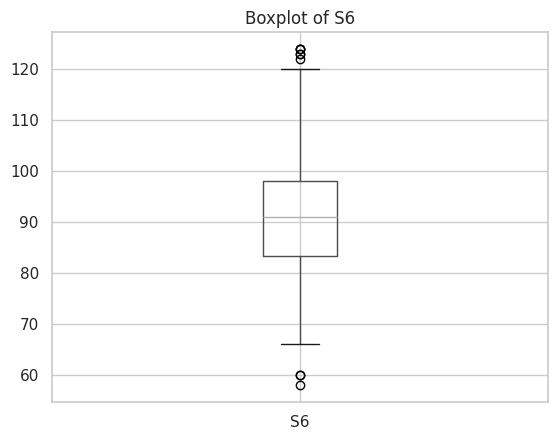

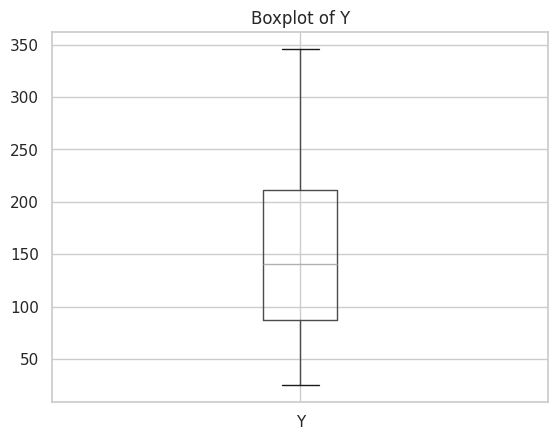

In [11]:
for col in df.select_dtypes(include=np.number).columns:
  plt.figure()
  df.boxplot(column=col)
  plt.title(f"Boxplot of {col}")
  plt.show()

## Outlier counts

In [12]:
outliers = {}

for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))
    outliers[col] = mask.sum()

outliers

{'AGE': np.int64(0),
 'SEX': np.int64(0),
 'BMI': np.int64(3),
 'BP': np.int64(0),
 'S1': np.int64(8),
 'S2': np.int64(7),
 'S3': np.int64(7),
 'S4': np.int64(2),
 'S5': np.int64(4),
 'S6': np.int64(9),
 'Y': np.int64(0)}

## Pairplot

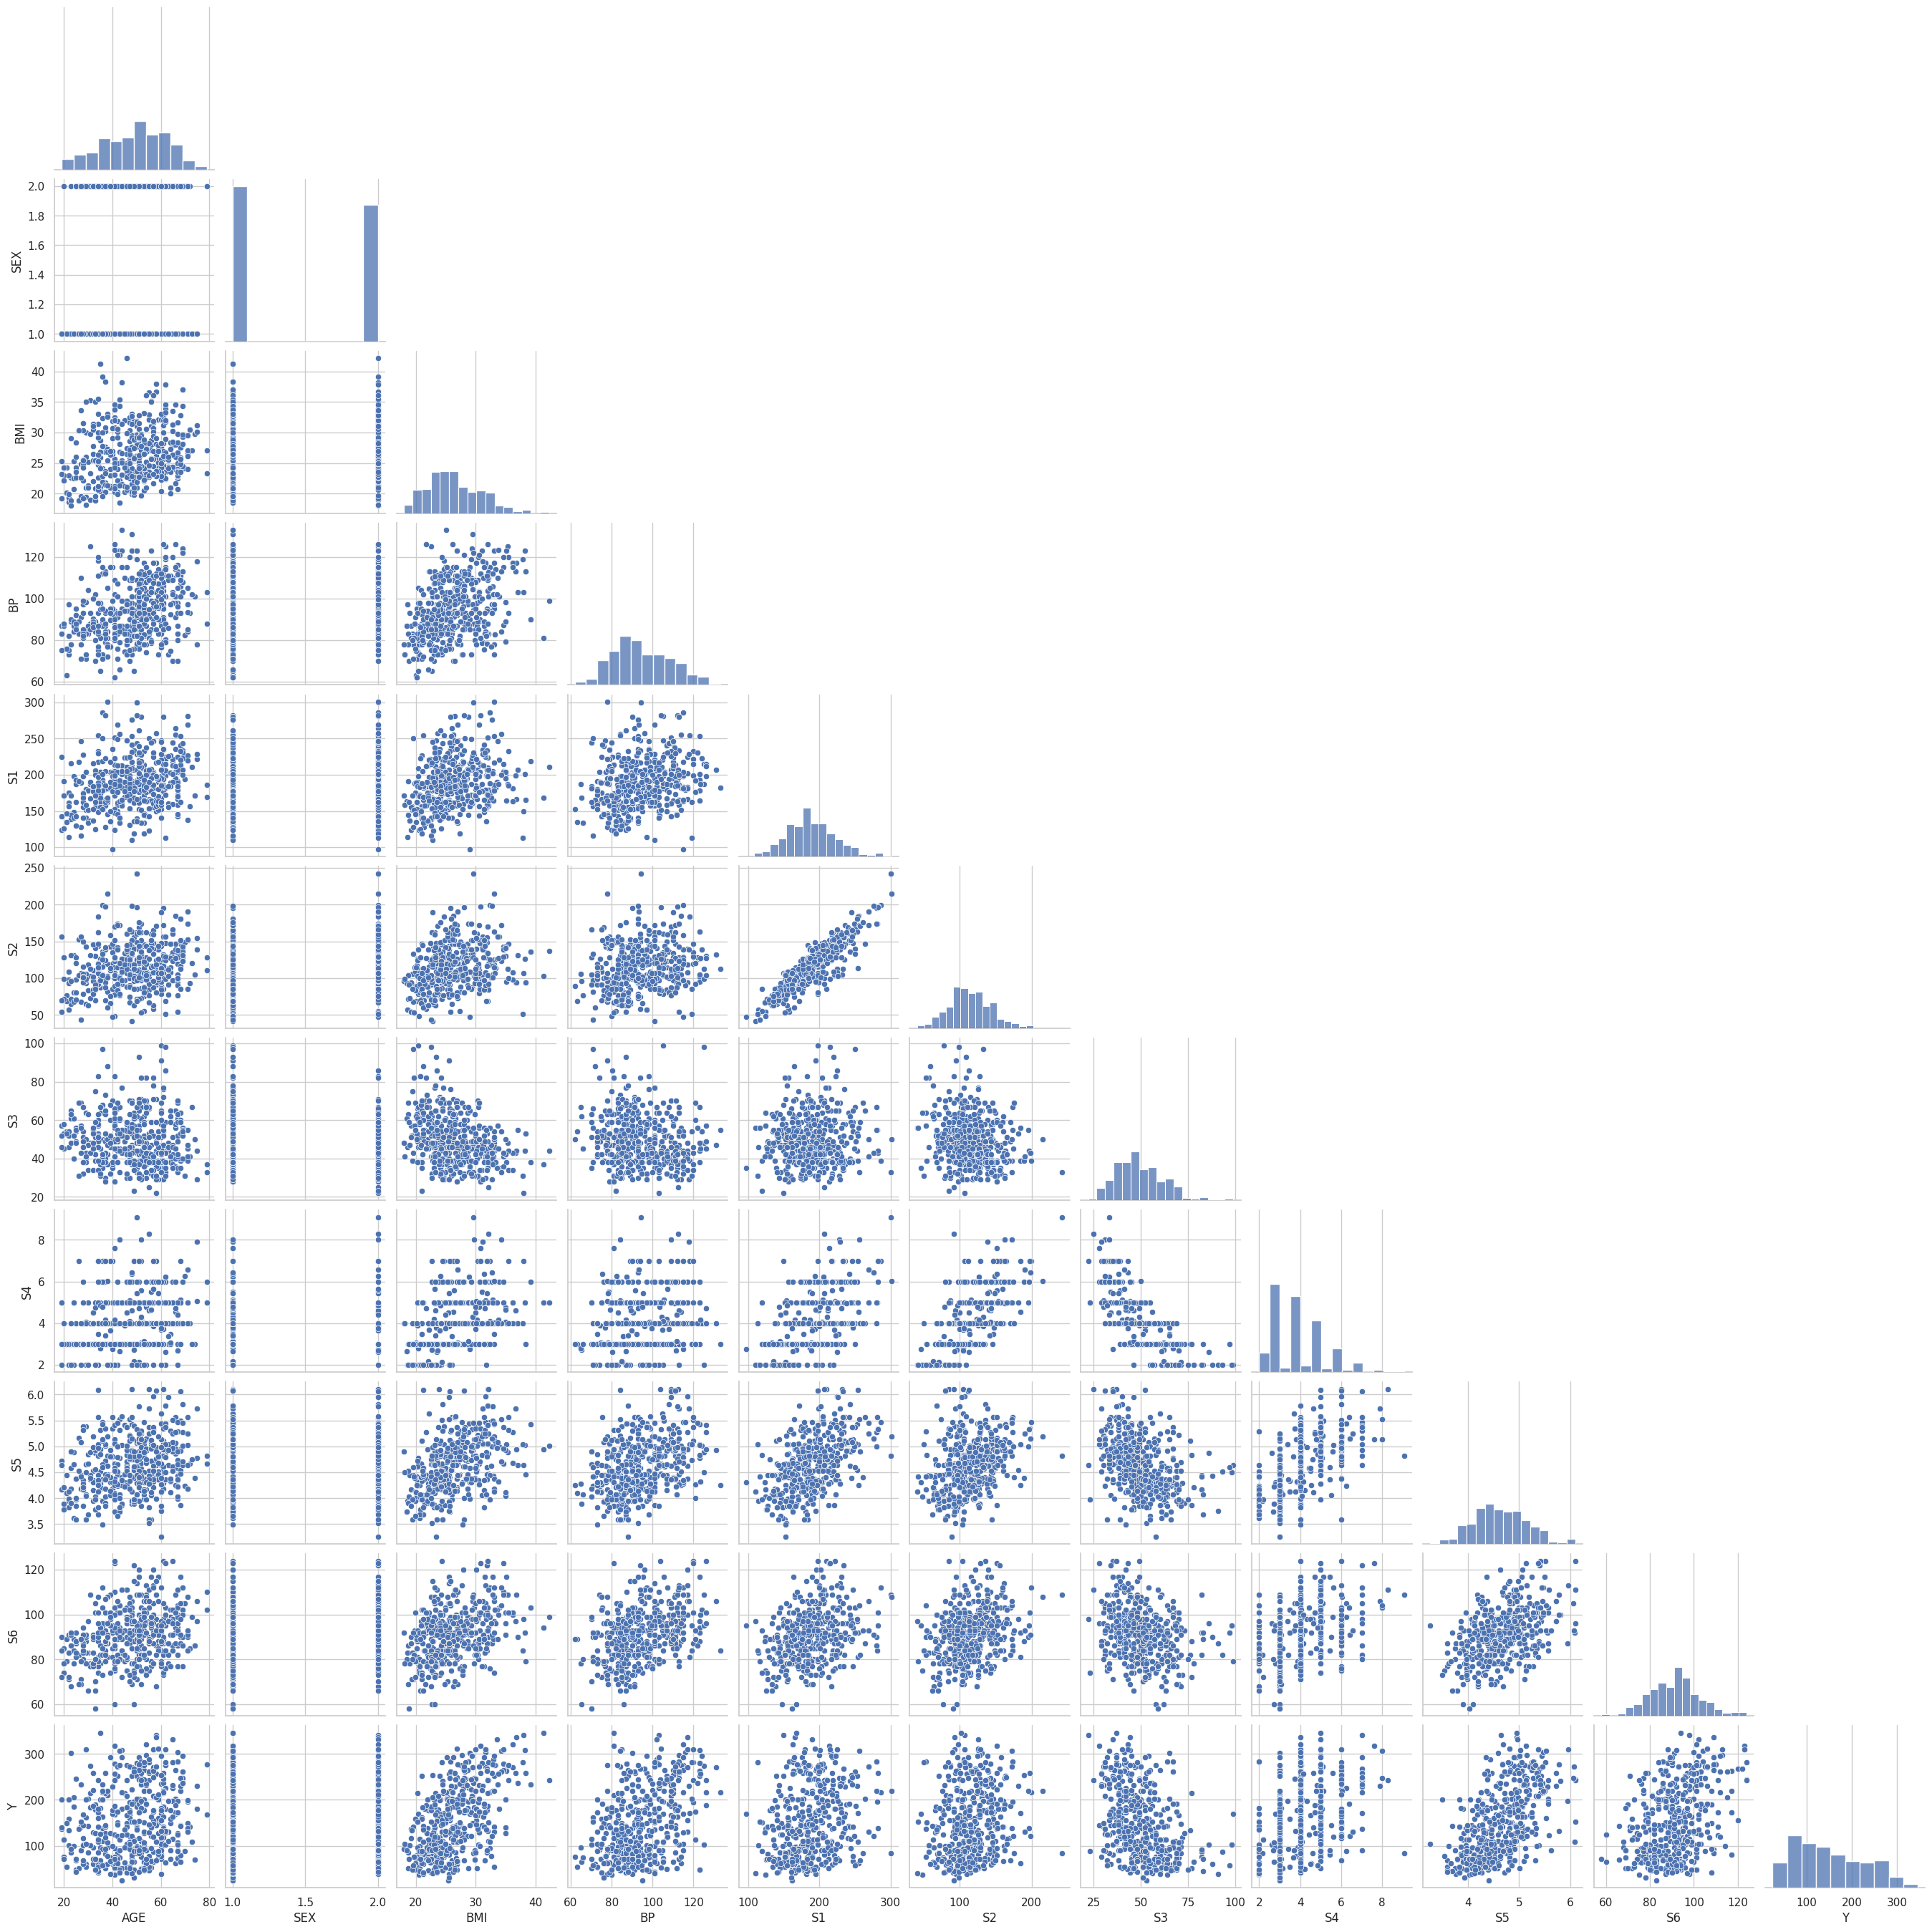

In [13]:
sns.pairplot(df, corner=True)
plt.show()

## Target variable distribution

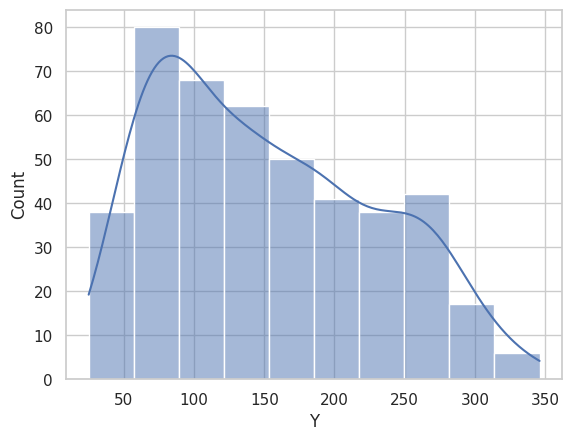

In [14]:
sns.histplot(df["Y"], kde=True)
plt.show()